In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim

In [2]:
# you can set your hyper-parameter here
# 设置一些参数

# epoch表示的是
epochs = 3

# 设置batch_size，也就是一个batch的大小
batch_size = 64

# 学习率
lr = 0.11

# 动量？？？0.5
momentum = 0.5

# 设置log_interval=10，每隔10个batch会输出，而batch_size=64,所以每隔640个数据输出一次
log_interval = 10

In [3]:
# dataset init,注意这里的Normalize，也就是说这里归一化了数据（transforms.Normalize...,感觉重复了，可以提取出来）

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

train_dataset = torchvision.datasets.MNIST('./data/', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('./data/', train=False, download=True, transform=transform)

# why *—loader？感觉像是要用batch_size,将之前的tensor<(1,28,28),label>的数据转换为tensor<(batch_size,1,28,28),label>的数据
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=4, shuffle=False)


torch.Size([64, 1, 28, 28])
torch.Size([64])


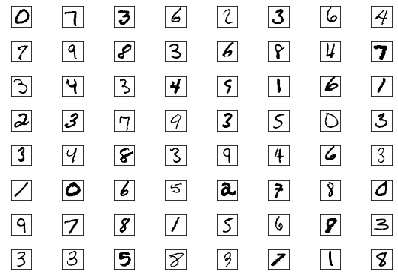

In [4]:
# data visualization，数据可视化
# 这里输出的是一个batch_size（也就是64张图片的量），所以只有一次next。
sample, label = next(iter(train_loader))
print(sample.shape) # one training data batch is a  tensor of shape [64, 1, 28, 28]
print(label.shape)

# 绘制多个图使用subplots，横8，纵8
fig, ax = plt.subplots(nrows=8,ncols=8,sharex=True,sharey=True)
ax = ax.flatten()

for i in range(64):
    img = sample[i].numpy().reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [5]:
# 试试全连接层
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1*28*28, 1728)
        self.fc2 = nn.Linear(1728, 256)
        self.fc3 = nn.Linear(256, 84)
        self.fc4 = nn.Linear(84, 10)

        
    def forward(self, x):
        x = x.view(-1,1*28*28)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)       
        return x
    


In [6]:
# model init
# 定义模型
model = Model()
# print(model)

# 作为分类问题，一般使用交叉熵的loss函数。查一下吧。
Loss = nn.CrossEntropyLoss()

# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=lr,momentum=momentum)

In [7]:
# training
batch_done = 0
logs = []
# 对每一个epoch都遍历。
for i in range(epochs):
    for data,label in train_loader:
        
        # 将梯度的存储tensor清空
        optimizer.zero_grad()
        
        # 通过输入data数据放入model中，然后给出预测值output，然后比较output和label的loss函数，然后梯度下降
        output = model(data);
        # print(output)
        loss=Loss(output,label)
        loss.backward()
        optimizer.step()
        
        # 标准化输出
        batch_done += 1
        if batch_done % log_interval == 0:
            logs.append([batch_done,loss.item()])
            print('Epoch {}: {}/{} loss:{}'.format(i, (batch_done)%len(train_loader), len(train_loader), loss.item()))

print("训练完成。。。。。")
    
    


Epoch 0: 10/938 loss:2.095118284225464
Epoch 0: 20/938 loss:1.054646611213684
Epoch 0: 30/938 loss:0.7171722650527954
Epoch 0: 40/938 loss:0.4574083089828491
Epoch 0: 50/938 loss:0.4624672532081604
Epoch 0: 60/938 loss:0.36953437328338623
Epoch 0: 70/938 loss:0.39832359552383423
Epoch 0: 80/938 loss:0.2850375473499298
Epoch 0: 90/938 loss:0.23291854560375214
Epoch 0: 100/938 loss:0.2239164412021637
Epoch 0: 110/938 loss:0.329656720161438
Epoch 0: 120/938 loss:0.22329020500183105
Epoch 0: 130/938 loss:0.18732789158821106
Epoch 0: 140/938 loss:0.22607849538326263
Epoch 0: 150/938 loss:0.23352345824241638
Epoch 0: 160/938 loss:0.3111855983734131
Epoch 0: 170/938 loss:0.24127697944641113
Epoch 0: 180/938 loss:0.3099995255470276
Epoch 0: 190/938 loss:0.10081849992275238
Epoch 0: 200/938 loss:0.24803775548934937
Epoch 0: 210/938 loss:0.241088405251503
Epoch 0: 220/938 loss:0.3789202570915222
Epoch 0: 230/938 loss:0.17563274502754211
Epoch 0: 240/938 loss:0.10337243229150772
Epoch 0: 250/938 

Epoch 2: 94/938 loss:0.01892305165529251
Epoch 2: 104/938 loss:0.009479895234107971
Epoch 2: 114/938 loss:0.006840739399194717
Epoch 2: 124/938 loss:0.013107456266880035
Epoch 2: 134/938 loss:0.03401758521795273
Epoch 2: 144/938 loss:0.02078857459127903
Epoch 2: 154/938 loss:0.012777326628565788
Epoch 2: 164/938 loss:0.043083786964416504
Epoch 2: 174/938 loss:0.012359180487692356
Epoch 2: 184/938 loss:0.08046548068523407
Epoch 2: 194/938 loss:0.021966813132166862
Epoch 2: 204/938 loss:0.10655159503221512
Epoch 2: 214/938 loss:0.037352725863456726
Epoch 2: 224/938 loss:0.1141817644238472
Epoch 2: 234/938 loss:0.05626425892114639
Epoch 2: 244/938 loss:0.039543695747852325
Epoch 2: 254/938 loss:0.10647860169410706
Epoch 2: 264/938 loss:0.03705838695168495
Epoch 2: 274/938 loss:0.008704007603228092
Epoch 2: 284/938 loss:0.04457353800535202
Epoch 2: 294/938 loss:0.0370061919093132
Epoch 2: 304/938 loss:0.0312940776348114
Epoch 2: 314/938 loss:0.0021607987582683563
Epoch 2: 324/938 loss:0.04

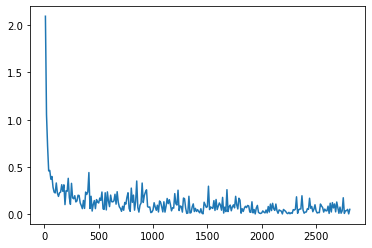

In [8]:
# # loss curve visualization，损失曲线可视化
# print(logs.shape)# (281, 2)
# print(logs)

logs = np.array(logs)
plt.plot(logs[:,0],logs[:,1])

In [9]:
# # evaluation，评估
model.eval()
correct = 0
for data, label in test_loader:
    output = model(data)
    _,pred = torch.max(output, dim=1)
    correct += float(torch.sum(pred == label))

print('test_acc:{}'.format(correct/len(test_dataset)))
    

test_acc:0.9785
